In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
training_set = pd.read_csv("Training Set.csv")
training_label = pd.read_csv("Training Set Labels.csv")
all_data = pd.merge(training_set, training_label, how="left", on="id")
print(all_data.shape)
all_data.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Cleansing

## Drop columns

In [20]:
feature_list = ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin',
 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'scheme_management',
 'permit', 'construction_year', 'extraction_type_group', 'extraction_type_class', 'management', 'payment_type', 'water_quality',
 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'status_group']

all_data = all_data[feature_list]
print(all_data.shape)
all_data.head()

(59400, 29)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,extraction_type_group,extraction_type_class,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,gravity,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,gravity,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,submersible,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


## Check each column

### "amount_tsh" - total static head (amount water available to waterpoint)

In [21]:
all_data["amount_tsh"].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

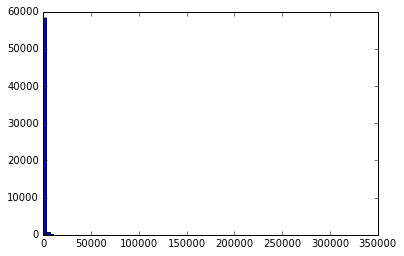

(18, 29)


In [57]:
plt.hist(all_data["amount_tsh"], 100)
plt.show()
#print(all_data[all_data["amount_tsh"] > 50000].shape)

There is obivous outliers, we should remove those.

### "date_recorded" - the date the row was entered

In [16]:
print(all_data["date_recorded"].describe())
print("Number of empty cells: ", all_data["date_recorded"].isnull().sum())

count          59400
unique           356
top       2011-03-15
freq             572
Name: date_recorded, dtype: object
Number of empty cells:  0


### "funder" - who funded the we

In [26]:
print(all_data["funder"].describe())
print("Number of empty cells: ", all_data["funder"].isnull().sum())

count                      55765
unique                      1897
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object
Number of empty cells:  3635


### "gps_height" - altitude of the well

In [29]:
print(all_data["gps_height"].describe())
print("Number of empty cells: ", all_data["gps_height"].isnull().sum())

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64
Number of empty cells:  0


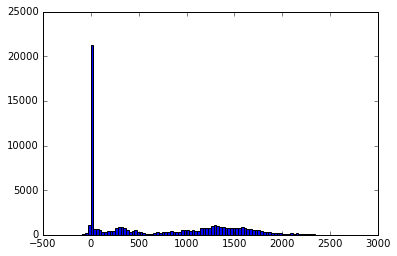

In [30]:
plt.hist(all_data["gps_height"], 100)
plt.show()

Tanzania's elevation extremes: 0m - 5895m (according to Wikipedia), **does that mean those with gps_height < 0 are wrong?**

### "installer" - organization that installed the well

In [31]:
print(all_data["installer"].describe())
print("Number of empty cells: ", all_data["installer"].isnull().sum())

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object
Number of empty cells:  3655


### "longitude"

In [33]:
print(all_data["longitude"].describe())
print("Number of empty cells: ", all_data["longitude"].isnull().sum())

count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64
Number of empty cells:  0


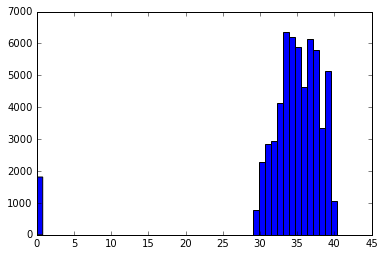

In [36]:
plt.hist(all_data["longitude"], 50)
plt.show()

Remove obvious outliers

### "latitude"

In [38]:
print(all_data["latitude"].describe())
print("Number of empty cells: ", all_data["latitude"].isnull().sum())

count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64
Number of empty cells:  0


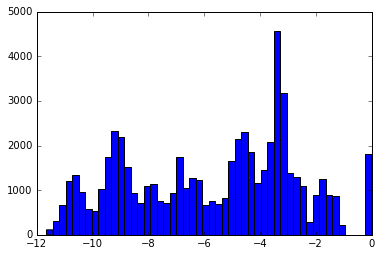

In [39]:
plt.hist(all_data["latitude"], 50)
plt.show()

### "basin" - geographic water basin

In [40]:
print(all_data["basin"].describe())
print("Number of empty cells: ", all_data["basin"].isnull().sum())

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object
Number of empty cells:  0


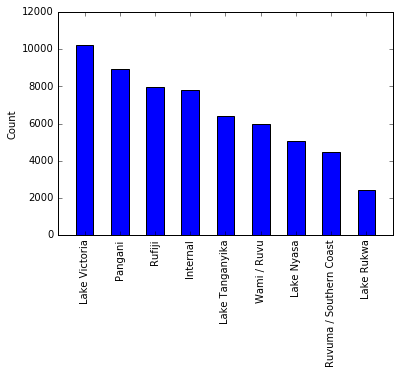

In [46]:
group = all_data.groupby(["basin"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### "subvillage" - geographic location

In [47]:
print(all_data["subvillage"].describe())
print("Number of empty cells: ", all_data["subvillage"].isnull().sum())

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object
Number of empty cells:  371


### "region" - geographic location

In [48]:
print(all_data["region"].describe())
print("Number of empty cells: ", all_data["region"].isnull().sum())

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object
Number of empty cells:  0


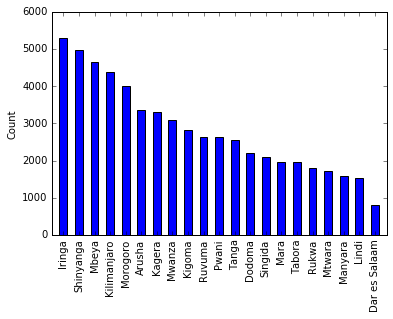

In [49]:
group = all_data.groupby(["region"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### "region_code" - geographic location (coded)

In [50]:
print(all_data["region_code"].describe())
print("Number of empty cells: ", all_data["region_code"].isnull().sum())

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64
Number of empty cells:  0


We should treat region code as object.

### "lga" - geographic location

In [52]:
print(all_data["lga"].describe())
print("Number of empty cells: ", all_data["lga"].isnull().sum())

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object
Number of empty cells:  0


### "ward" - geographic location

In [53]:
print(all_data["ward"].describe())
print("Number of empty cells: ", all_data["ward"].isnull().sum())

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object
Number of empty cells:  0


### "population" - population around the well

In [54]:
print(all_data["population"].describe())
print("Number of empty cells: ", all_data["population"].isnull().sum())

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64
Number of empty cells:  0


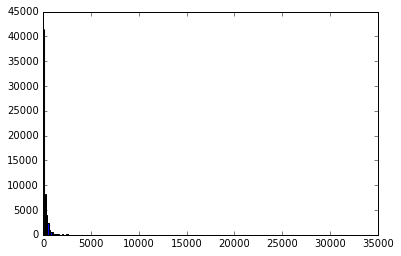

In [61]:
plt.hist(all_data["population"], 200)
plt.show()

In [68]:
#a = all_data[all_data["population"] == 0]
#a.groupby(["status_group"]).size()

status_group
functional                 11274
functional needs repair     1775
non functional              8332
dtype: int64

We should remove the obvious outliers. And why so many 0 population?!

### "public_meeting" - True/False

In [58]:
print(all_data["public_meeting"].describe())
print("Number of empty cells: ", all_data["public_meeting"].isnull().sum())

count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object
Number of empty cells:  3334


### "scheme_management" - who operates the waterpoint

In [59]:
print(all_data["scheme_management"].describe())
print("Number of empty cells: ", all_data["scheme_management"].isnull().sum())

count     55523
unique       12
top         VWC
freq      36793
Name: scheme_management, dtype: object
Number of empty cells:  3877


### "permit" - if the waterpoint is permitted

In [60]:
print(all_data["permit"].describe())
print("Number of empty cells: ", all_data["permit"].isnull().sum())

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object
Number of empty cells:  3056


### "construction_year" - year the waterpoint was constructed

In [69]:
print(all_data["construction_year"].describe())
print("Number of empty cells: ", all_data["construction_year"].isnull().sum())

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64
Number of empty cells:  0


In [72]:
# Check how many different years
print(all_data[all_data["construction_year"] != 0]["construction_year"].describe())

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64


We should treat this as categorical data